## House Price Prediction Challenge

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
df.tail()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0
29450,Dealer,0,1,2,BHK,896.774194,1,1,"Jagatpura,Jaipur",26.832353,75.841749,27.8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [6]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [7]:
df.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000


<AxesSubplot:>

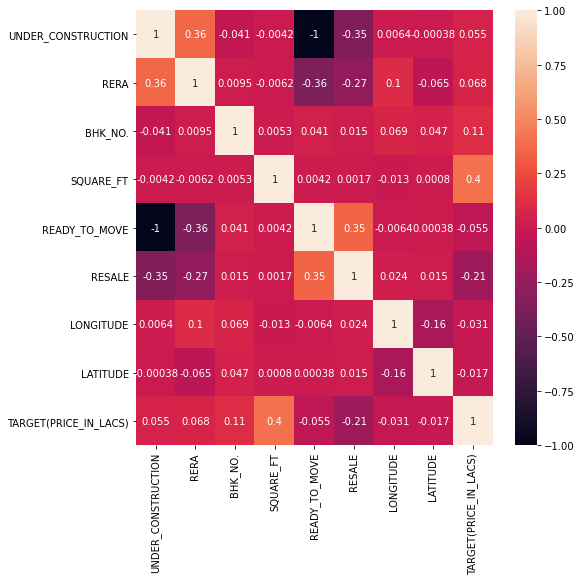

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [11]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

<AxesSubplot:>

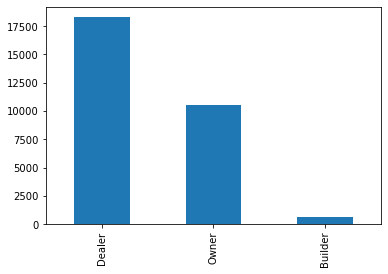

In [13]:
df.POSTED_BY.value_counts().plot.bar()

<AxesSubplot:>

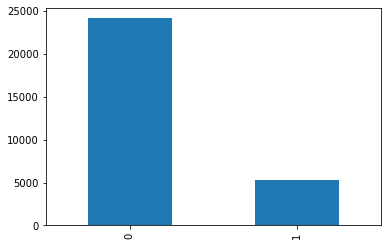

In [17]:
df.UNDER_CONSTRUCTION=df.UNDER_CONSTRUCTION.astype("category")
df.UNDER_CONSTRUCTION.value_counts().plot.bar()

<AxesSubplot:>

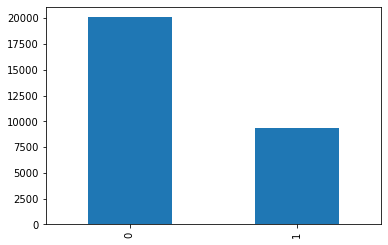

In [16]:
df.RERA.value_counts().plot.bar()

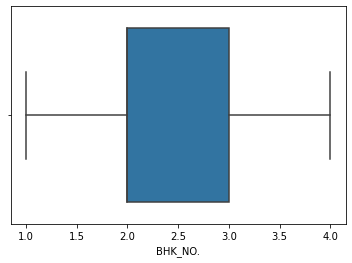

In [23]:
sns.boxplot(df["BHK_NO."])
df=df[df["BHK_NO."]<5.0]

<AxesSubplot:>

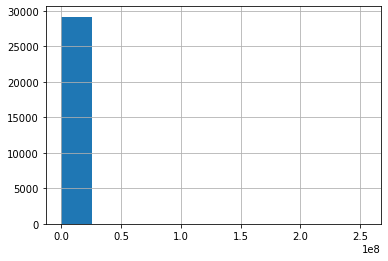

In [28]:
df["SQUARE_FT"].hist()

<AxesSubplot:>

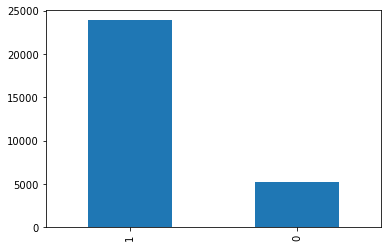

In [29]:
df.READY_TO_MOVE=df.READY_TO_MOVE.astype("category")
df.READY_TO_MOVE.value_counts().plot.bar()

In [30]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

<AxesSubplot:>

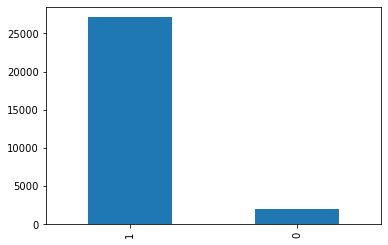

In [32]:
df.RESALE=df.RESALE.astype("category")
df.RESALE.value_counts().plot.bar()

In [43]:
df["Province"]=df.ADDRESS.str.split(",").str[-1]

<Figure size 1440x360 with 0 Axes>

In [46]:
df["District"]=df.ADDRESS.str.split(",").str[-2]

In [49]:
df.drop(["ADDRESS","LONGITUDE","LATITUDE"],axis=1,inplace=True)

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)'>

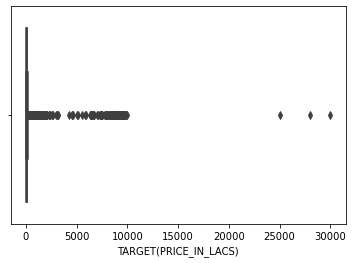

In [56]:
sns.boxplot(df["TARGET(PRICE_IN_LACS)"])

In [57]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [58]:
x,y=df.drop(["TARGET(PRICE_IN_LACS)"],axis=1),df[["TARGET(PRICE_IN_LACS)"]] 
x=pd.get_dummies(x,drop_first=True)

In [59]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.706042,340.587168,44.465330
ExtraTreeRegressor,0.682517,353.953574,35.514636
KNeighborsRegressor,0.575208,409.424877,63.241614
Lasso,0.235462,549.269468,119.122137
Ridge,0.217478,555.692127,132.067059
LinearRegression,0.207216,559.324124,139.019477
ElasticNet,0.202616,560.944452,112.270992


## Deep Learning Uygulanırsa?

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [61]:
x=scaler.fit_transform(x)

In [62]:
x.shape,y.shape

((29167, 6097), (29167, 1))

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [64]:
model=Sequential()
model.add(Dense(440, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(380, activation='relu'))
model.add(Dense(340, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(220, activation='relu'))
model.add(Dense(198, activation='relu'))
model.add(Dense(180, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')#mse regression

In [66]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
183/183 [==============================] - 5s 27ms/step - loss: 334387.1562 - val_loss: 400776.5000
Epoch 2/20
183/183 [==============================] - 5s 27ms/step - loss: 549885.8750 - val_loss: 538662.6875
Epoch 3/20
183/183 [==============================] - 6s 31ms/step - loss: 333294.2812 - val_loss: 390651.4688
Epoch 4/20
183/183 [==============================] - 7s 36ms/step - loss: 340981.8125 - val_loss: 392261.4062
Epoch 5/20
183/183 [==============================] - 5s 29ms/step - loss: 289976.9062 - val_loss: 378785.4062
Epoch 6/20
183/183 [==============================] - 6s 31ms/step - loss: 240929.1406 - val_loss: 406938.7188
Epoch 7/20
183/183 [==============================] - 6s 32ms/step - loss: 230970.7656 - val_loss: 402956.5000
Epoch 8/20
183/183 [==============================] - 6s 32ms/step - loss: 272176.8438 - val_loss: 387072.8750
Epoch 9/20
183/183 [==============================] - 6s 35ms/step - loss: 318163.3125 - val_loss: 387844.3125
E

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 440)               2683120   
_________________________________________________________________
dense_1 (Dense)              (None, 400)               176400    
_________________________________________________________________
dense_2 (Dense)              (None, 380)               152380    
_________________________________________________________________
dense_3 (Dense)              (None, 340)               129540    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               102300    
_________________________________________________________________
dense_5 (Dense)              (None, 250)               75250     
_________________________________________________________________
dense_6 (Dense)              (None, 220)               5

<AxesSubplot:>

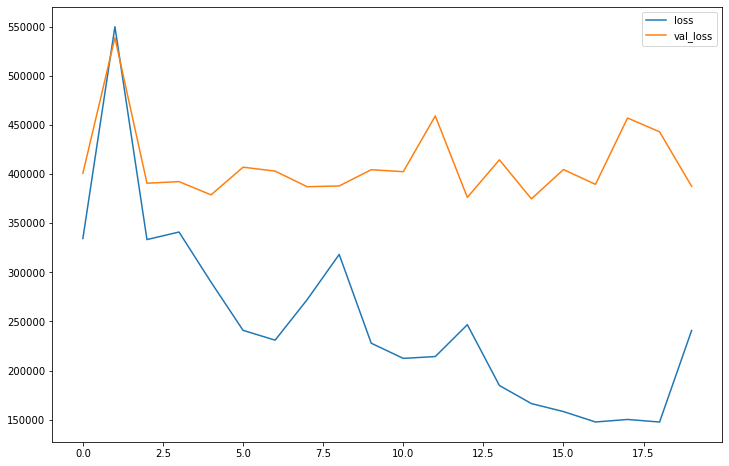

In [68]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [69]:
pred=model.predict(x_test)

In [70]:
(mean_squared_error(y_test,pred))**.5

622.4744501450334

In [71]:
r2_score(y_test,pred) 

0.018091433983439265